In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

mydata = pd.read_json("data/employes_data.json")

In [3]:
mydata.shape

(100, 7)

In [4]:
mydata.columns

Index(['age', 'experience', 'niveau_etude', 'heures_par_semaine', 'secteur',
       'ville', 'revenu'],
      dtype='object')

In [5]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 100 non-null    int64 
 1   experience          100 non-null    int64 
 2   niveau_etude        100 non-null    object
 3   heures_par_semaine  100 non-null    int64 
 4   secteur             100 non-null    object
 5   ville               100 non-null    object
 6   revenu              100 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 5.6+ KB


In [6]:
mydata.head()

,age,experience,niveau_etude,heures_par_semaine,secteur,ville,revenu
0,36,13,Doctorat,41,Éducation,Fès,14051
1,55,35,Master,46,Finance,Casablanca,14914
2,24,2,Licence,48,Éducation,Casablanca,5000
3,55,34,Licence,49,Finance,Marrakech,13220
4,44,23,Master,39,Éducation,Casablanca,12115


In [7]:
mydata.isnull().sum()

,0
age,0
experience,0
niveau_etude,0
heures_par_semaine,0
secteur,0
ville,0
revenu,0


In [8]:
mydata.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
95,False
96,False
97,False
98,False


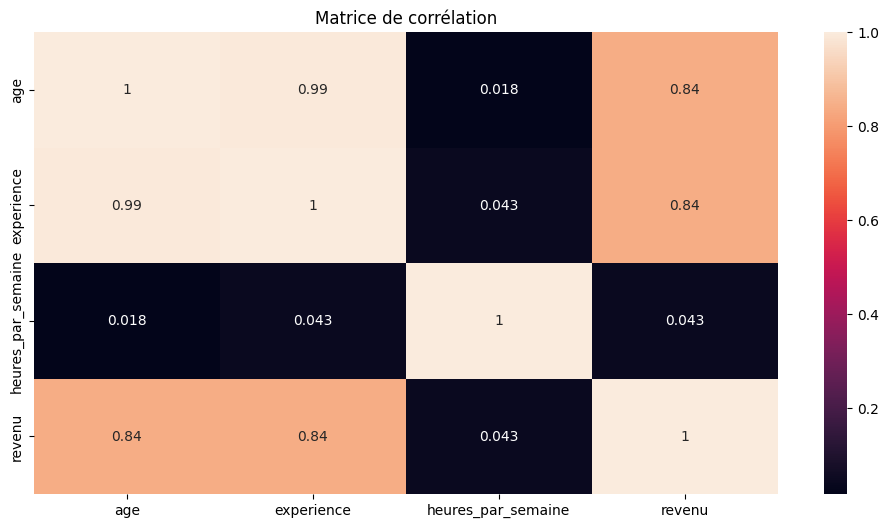

In [9]:
num_data = mydata.select_dtypes(include="number")
plt.figure(figsize=(12,6))
sns.heatmap(num_data.corr(), annot=True)
plt.title("Matrice de corrélation")
plt.show()

<Figure size 1200x600 with 0 Axes>

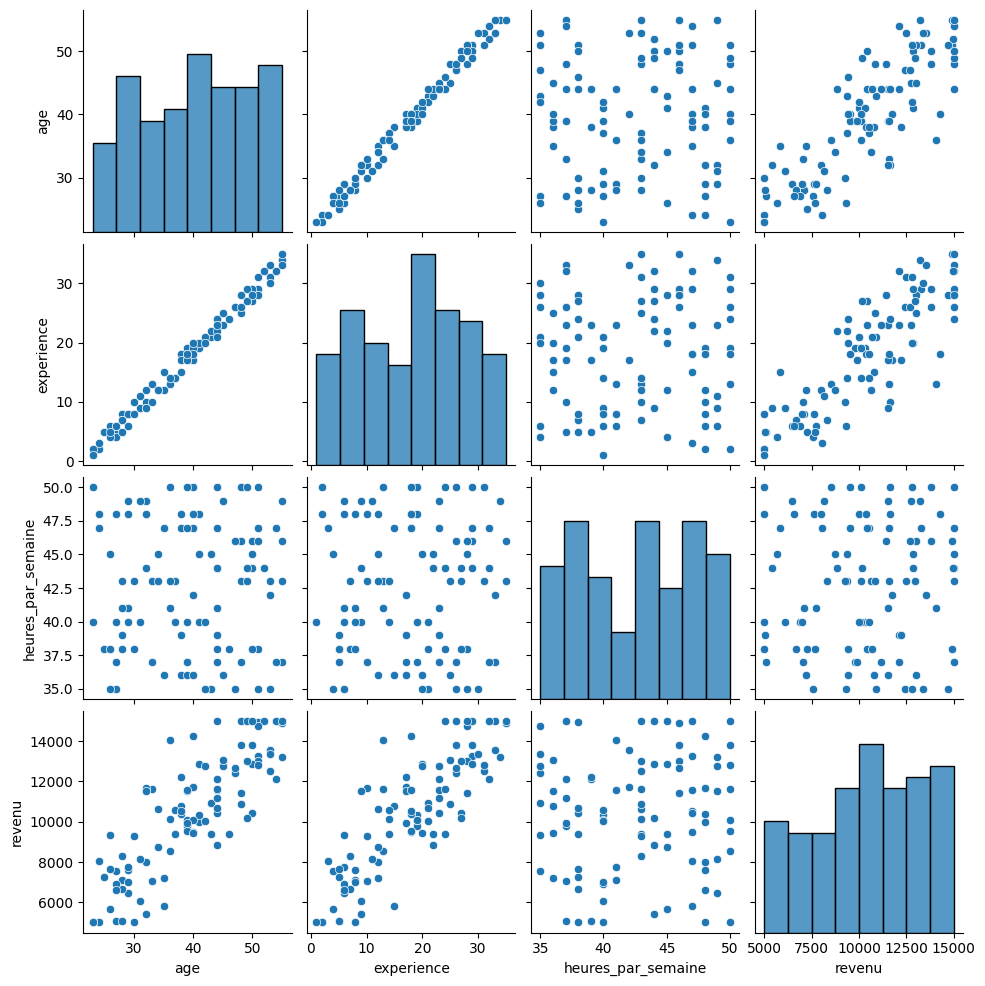

In [10]:
plt.figure(figsize=(12,6))
sns.pairplot(mydata)
plt.show()

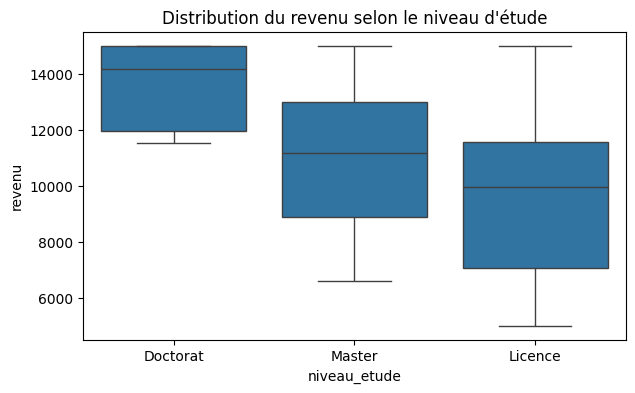

In [11]:
plt.figure(figsize=(7,4))
sns.boxplot(x="niveau_etude", y="revenu", data=mydata)
plt.title("Distribution du revenu selon le niveau d'étude")
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x =  mydata[['age','experience', 'heures_par_semaine']]
y = mydata['revenu']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [13]:
y_pred = model.predict(x_test)

In [14]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 3230898.99
R-squared (R2): 0.69


In [15]:
coeffs = pd.DataFrame({
    "Variable": x.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)
print(coeffs)


             Variable  Coefficient
1          experience   131.233562
0                 age   130.998481
2  heures_par_semaine    16.138072


/tmp/ipython-input-1991370470.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coeffs, palette='viridis')


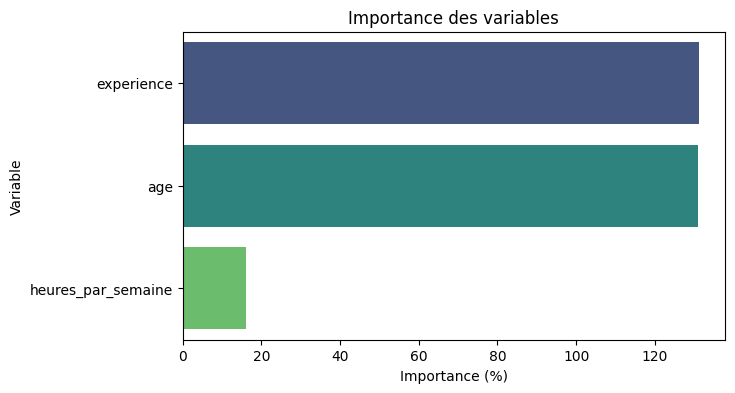

In [20]:
plt.figure(figsize=(7,4))
sns.barplot(x='Coefficient', y='Variable', data=coeffs, palette='viridis')
plt.title("Importance des variables")
plt.xlabel("Importance (%)")
plt.ylabel("Variable")
plt.show()

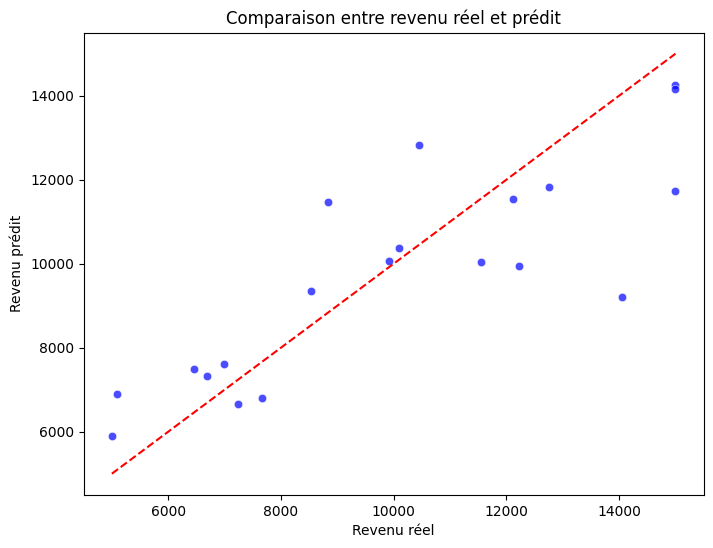

In [19]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color="blue", alpha=0.7)
plt.xlabel("Revenu réel")
plt.ylabel("Revenu prédit")
plt.title("Comparaison entre revenu réel et prédit")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()